In [1]:
import numpy as np
from nn import nn, io, preprocess

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
architecture = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'}, 
                {'input_dim': 16, 'output_dim': 64, 'activation': 'sigmoid'}]

my_nn = nn.NeuralNetwork(nn_arch=architecture, lr=1, seed=42, batch_size=10, epochs=100, loss_function='mse')

In [3]:
# load data and re-scale to be within [0,1] (will be easier to match with sigmoid outputs)
digits = datasets.load_digits()
digits_data_normalized = digits.data / 16

In [4]:
# split and train
X_train, X_test, y_train, y_test = train_test_split(digits_data_normalized, digits_data_normalized, test_size=0.3, random_state=42, shuffle=True, stratify=None)

per_epoch_loss_train, per_epoch_loss_val = my_nn.fit(X_train, y_train, X_test, y_test)

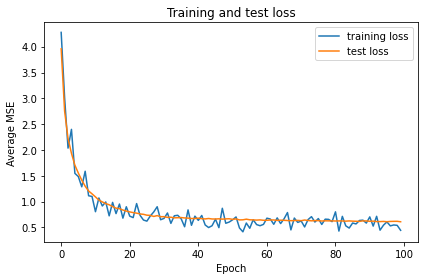

In [9]:
# plot training and test losses across epochs
plt.plot(per_epoch_loss_train)
plt.plot(per_epoch_loss_val)

plt.xlabel('Epoch')
plt.ylabel('Average MSE')
plt.title('Training and test loss')
plt.legend(['training loss', 'test loss'])
plt.tight_layout()

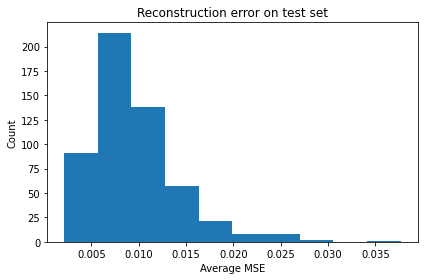

In [6]:
# plot average reconstruction loss (MSE) over validation set
val_losses = (y_test - my_nn.predict(X_test)) ** 2

plt.hist(np.mean(val_losses, axis=1))
plt.xlabel('Average MSE')
plt.ylabel('Count')
plt.title('Reconstruction error on test set')
plt.tight_layout()

Original test example


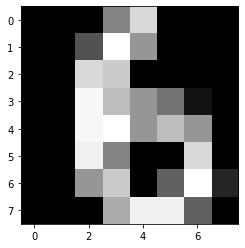

In [12]:
plt.imshow(X_test[:419,:][0,:].reshape((8,8)), cmap='Greys_r')
print('Original test example')

Reconstructed test example


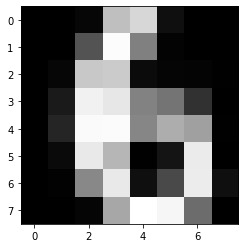

In [13]:
plt.imshow(my_nn.predict(X_test[:419,:])[0,:].reshape((8,8), order='A'), cmap='Greys_r')
print('Reconstructed test example')

### Choice of loss
I chose to use the mean squared-error loss because this is a reconstruction task, rather than a classification task in which the outputs should represent probabilities. Furthermore, the values of each element in the output vector are not inherently related, eg in a multi-class classification task the probabilities of all classes that are mutually exclusive should sum to 1, maling cross-entropy a good choice for a loss, but here the values of different pixels are not bounded by each others' values.

I also chose to rescale my data to be in [0, 1] rather than [0, 16] and to use a sigmoid as the activation for the output layer because individual pixel values are bounded above and below by the encoding used for the images, and a sigmoid is similarly bounded. A ReLU output does not have an upper bound and did not seem appropriate. I did not try using a ReLU output, but I expect that it could produce arbitrarily large errors and very large gradients, which may result in unstable training.


### Choice of hyperparameters
To choose hyperparameters, I started by increasing learning rate until I began to observe instability in the training loss and then increased the number of epochs and decreased the batch size until the training loss plateaued. I found that these settings produced a good reconstruction loss for both the training and test data.